# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [2]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [3]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [4]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1648577768000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":322},"features":[{"type":"Feature","properties":{"mag":2.5,"place":"25 km NW of Willow, Alaska","time":1648576191607,"updated":1648576805848,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak02241tpiqs","detail":"https://earthquake.usgs.gov/ea


In [5]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [6]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 2.5, 'place': '25 km NW of Willow, Alaska', 'time': 1648576191607, 'updated': 1648576805848, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak02241tpiqs', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak02241tpiqs.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 96, 'net': 'ak', 'code': '02241tpiqs', 'ids': ',ak02241tpiqs,', 'sources': ',ak,', 'types': ',origin,phase-data,', 'nst': None, 'dmin': None, 'rms': 0.8, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 2.5 - 25 km NW of Willow, Alaska'}, 'geometry': {'type': 'Point', 'coordinates': [-150.4211, 61.8815, 33.3]}, 'id': 'ak02241tpiqs'}


In [23]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-150.4211, 61.8815, 33.3], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '02241tpiqs',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak02241tpiqs.geojson',
 'dmin': None,
 'felt': None,
 'gap': None,
 'ids': ',ak02241tpiqs,',
 'mag': 2.5,
 'magType': 'ml',
 'mmi': None,
 'net': 'ak',
 'nst': None,
 'place': '25 km NW of Willow, Alaska',
 'rms': 0.8,
 'sig': 96,
 'sources': ',ak,',
 'status': 'automatic',
 'time': 1648576191607,
 'title': 'M 2.5 - 25 km NW of Willow, Alaska',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',origin,phase-data,',
 'tz': None,
 'updated': 1648576805848,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak02241tpiqs'}


In [8]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.5 - 25 km NW of Willow, Alaska
M 5.4 - 140 km WNW of Naha, Japan
M 5.5 - off the coast of Michoacan, Mexico
M 4.9 - 80 km WNW of Cabra, Philippines
M 4.4 - 62 km ESE of Ishinomaki, Japan
M 4.6 - 46 km E of Ichinohe, Japan
M 4.4 - 130 km WNW of Naha, Japan
M 4.2 - 136 km NW of Hirara, Japan
M 4.3 - 179 km WSW of Puerto Casma, Peru
M 3.5 - 26 km E of Honaunau-Napoopoo, Hawaii
M 2.5 - 22 km ENE of Honaunau-Napoopoo, Hawaii
M 2.8 - 20 km ENE of Honaunau-Napoopoo, Hawaii
M 2.5 - 8 km E of Skwentna, Alaska
M 4.3 - 1 km ESE of Sardínia, Greece
M 2.9 - 3 km SSE of Guánica, Puerto Rico
M 3.7 - 114 km NE of Punta Cana, Dominican Republic
M 2.7 - 7 km WSW of La Parguera, Puerto Rico
M 4.4 - 71 km E of Hualien City, Taiwan
M 2.6 - 40 km E of Port Alsworth, Alaska
M 3.0 - 4 km S of Macclesfield, Australia
M 4.5 - 6 km SSW of Tual, Indonesia
M 5.2 - 234 km ESE of Tadine, New Caledonia
M 2.7 - 53 km NW of Toyah, Texas
M 2.6 - 17 km NE of West Yellowstone, Montana
M 2.9 - 16 km SW of Coyanosa, Tex

In [10]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

322


In [11]:
# print the first few lines of data

print(df.head())

   magnitude  depth
0        2.5   33.3
1        5.4   10.0
2        5.5   10.0
3        4.9   10.0
4        4.4   35.0


In [12]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  322.000000  322.000000
mean     3.810544   49.277834
std      0.968182   90.583932
min      2.450000   -1.230000
25%      2.800000   10.000000
50%      4.100000   10.970000
75%      4.600000   49.000000
max      6.000000  597.700000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

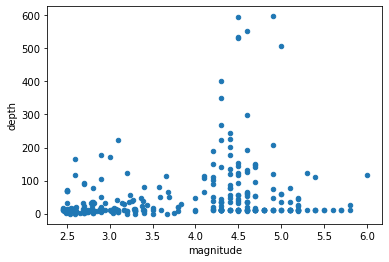

In [13]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [14]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [15]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude  depth
0           0        2.5   33.3
1           1        5.4   10.0
2           2        5.5   10.0
3           3        4.9   10.0
4           4        4.4   35.0


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [ ]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [ ]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

In [ ]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

In [ ]:
# print it more nicely

pp.pprint(data)

In [ ]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [21]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

ModuleNotFoundError: No module named 'TwitterAPI'

In [ ]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [ ]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

### Making a simple data request

In [ ]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

In [ ]:
# what other data is there?

pp.pprint(tweet)

### Other API endpoints allow different types of searches

In [ ]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

In [ ]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

In [ ]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [ ]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [55]:
# pull out the coordinates of each earthquake 
for q in quakes:
    print(q['geometry']['coordinates'])

[-150.4211, 61.8815, 33.3]
[126.4369, 26.8123, 10]
[-104.396, 15.2266, 10]
[119.3435, 14.109, 10]
[141.9988, 38.286, 35]
[141.8255, 40.1422, 33.46]
[126.5865, 26.8631, 10]
[124.55, 25.8291, 189.37]
[-79.802, -10.2702, 10]
[-155.616166666667, 19.42, -0.79]
[-155.658828735352, 19.5021667480469, -1.23000001907349]
[-155.677, 19.5085, 5.11]
[-151.2371, 61.9928, 68.2]
[21.2267, 38.8865, 10]
[-66.8941666666667, 17.9443333333333, 7.26]
[-67.7135, 19.375, 49]
[-67.1073333333333, 17.9455, 10.94]
[122.3055, 23.9243, 10]
[-153.5874, 60.1596, 166]
[138.8378, -35.2131, 10]
[132.723, -5.6818, 10]
[170.069, -22.1111, 10]
[-104.2152, 31.6384, 5]
[-110.922, 44.7578333, 10.21]
[-103.1901, 31.1443, 6.44]
[-111.4633333, 42.5991667, 3.79]
[-66.4228333333333, 18.562, 78.96]
[-156.091333333333, 19.8993333333333, 46.54]
[-67.1143333333333, 17.956, 10.71]
[-179.7865, -23.7103, 530.38]
[-152.3265, 59.0758, 49.3]
[-152.2327, 59.3864, 66.9]
[77.8065, 35.9756, 10]
[14.0079, 38.9551, 400.11]
[169.1003, -18.7663, 20

In [68]:
# pull out longitude and latitude into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists
a = {'longitude': [q['geometry']['coordinates'][0] for q in quakes],
     'latitude': [q['geometry']['coordinates'][1] for q in quakes]}
df2 = pd.DataFrame.from_dict(a)
print(df2)

     longitude   latitude
0    -150.4211  61.881500
1     126.4369  26.812300
2    -104.3960  15.226600
3     119.3435  14.109000
4     141.9988  38.286000
..         ...        ...
317   -66.9315  17.969167
318   121.5322  23.408500
319   121.6059  23.496400
320   121.5633  23.426500
321   121.6863  23.367000

[322 rows x 2 columns]


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

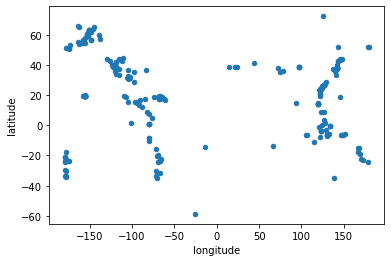

In [70]:
# plot the lattitude vs. longitude coordinates of earthquakes

df2.plot(x='longitude', y='latitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
